<a href="https://colab.research.google.com/github/k589k589/DeepLearning/blob/main/%E5%AF%A6%E4%BD%9C%E5%A4%9A%E6%A8%99%E7%B1%A4%E5%A4%9A%E5%85%83%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
import pandas as pd
import numpy as np
import tensorflow as tf


In [ ]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=5000)

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

4999

In [ ]:
word_index=imdb.get_word_index()


1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [ ]:

import numpy as np
def vectorize_sequences(sequences, dimension=5000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow import keras


In [ ]:
model=keras.Sequential([
                        layers.Dense(16,activation='relu'),
                        layers.Dense(16,activation='relu'),
                        layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=256,validation_data=(x_val,y_val))

Epoch 1/20
59/59 [==============================] - 3s 28ms/step - loss: 0.4476 - accuracy: 0.8132 - val_loss: 0.3255 - val_accuracy: 0.8791
Epoch 2/20
59/59 [==============================] - 1s 20ms/step - loss: 0.2639 - accuracy: 0.9055 - val_loss: 0.3018 - val_accuracy: 0.8778
Epoch 3/20
59/59 [==============================] - 1s 20ms/step - loss: 0.2121 - accuracy: 0.9217 - val_loss: 0.2870 - val_accuracy: 0.8833
Epoch 4/20
59/59 [==============================] - 1s 20ms/step - loss: 0.1822 - accuracy: 0.9321 - val_loss: 0.2963 - val_accuracy: 0.8822
Epoch 5/20
59/59 [==============================] - 1s 20ms/step - loss: 0.1583 - accuracy: 0.9405 - val_loss: 0.3116 - val_accuracy: 0.8769
Epoch 6/20
59/59 [==============================] - 1s 19ms/step - loss: 0.1398 - accuracy: 0.9491 - val_loss: 0.3321 - val_accuracy: 0.8764
Epoch 7/20
59/59 [==============================] - 1s 20ms/step - loss: 0.1261 - accuracy: 0.9553 - val_loss: 0.3746 - val_accuracy: 0.8668
Epoch 8/20
59

In [ ]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show>

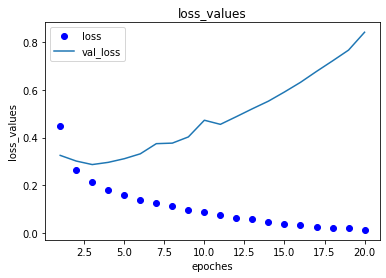

In [ ]:
import matplotlib.pyplot as plt
loss_values=history_dict['loss']
val_loss=history_dict['val_loss']
epoches=range(1,21)
plt.plot(epoches,loss_values,'bo',label='loss')
plt.plot(epoches,val_loss,label='val_loss')
plt.title('loss_values')
plt.xlabel('epoches')
plt.ylabel('loss_values')
plt.legend()
plt.show

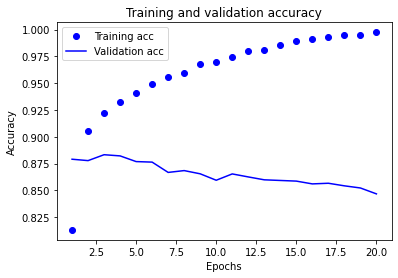

In [ ]:

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epoches, acc, "bo", label="Training acc")
plt.plot(epoches, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [ ]:
x_train = vectorize_sequences(train_data,dimension=10000)
x_test = vectorize_sequences(test_data,dimension=10000)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train=to_categorical(train_labels)
y_test=to_categorical(test_labels)

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
history=model.fit(partial_x_train,partial_y_train,epochs=10,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/10
16/16 [==============================] - 1s 44ms/step - loss: 0.0669 - accuracy: 0.9674 - val_loss: 1.0833 - val_accuracy: 0.8030
Epoch 2/10
16/16 [==============================] - 1s 41ms/step - loss: 0.0604 - accuracy: 0.9673 - val_loss: 1.0922 - val_accuracy: 0.8040
Epoch 3/10
16/16 [==============================] - 1s 41ms/step - loss: 0.0567 - accuracy: 0.9672 - val_loss: 1.1011 - val_accuracy: 0.8050
Epoch 4/10
16/16 [==============================] - 1s 39ms/step - loss: 0.0548 - accuracy: 0.9657 - val_loss: 1.1180 - val_accuracy: 0.8060
Epoch 5/10
16/16 [==============================] - 1s 40ms/step - loss: 0.0541 - accuracy: 0.9632 - val_loss: 1.1219 - val_accuracy: 0.8030
Epoch 6/10
16/16 [==============================] - 1s 39ms/step - loss: 0.0540 - accuracy: 0.9615 - val_loss: 1.1372 - val_accuracy: 0.8020
Epoch 7/10
16/16 [==============================] - 1s 39ms/step - loss: 0.0530 - accuracy: 0.9632 - val_loss: 1.1368 - val_accuracy: 0.8040
Epoch 8/10
16

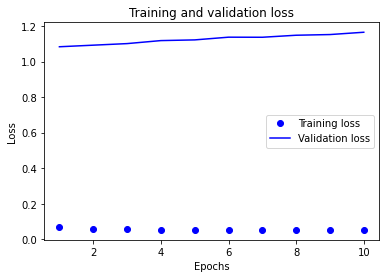

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

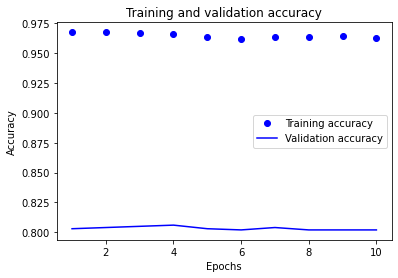

In [ ]:

plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:

model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 40ms/step - loss: 2.5108 - accuracy: 0.5252
Epoch 2/9
18/18 [==============================] - 1s 41ms/step - loss: 1.3520 - accuracy: 0.7140
Epoch 3/9
18/18 [==============================] - 1s 39ms/step - loss: 0.9911 - accuracy: 0.7955
Epoch 4/9
18/18 [==============================] - 1s 40ms/step - loss: 0.7681 - accuracy: 0.8401
Epoch 5/9
18/18 [==============================] - 1s 39ms/step - loss: 0.6010 - accuracy: 0.8741
Epoch 6/9
18/18 [==============================] - 1s 39ms/step - loss: 0.4780 - accuracy: 0.8997
Epoch 7/9
18/18 [==============================] - 1s 39ms/step - loss: 0.3830 - accuracy: 0.9189
Epoch 8/9
18/18 [==============================] - 1s 40ms/step - loss: 0.3114 - accuracy: 0.9309
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9880 - accuracy: 0.7894


In [ ]:

results

[0.987957239151001, 0.7894033789634705]

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1794300979519145

In [ ]:
predictions = model.predict(x_test)

In [ ]:

predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

1.0000001

In [ ]:
np.argmax(predictions[0])

3

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 20ms/step - loss: 2.5937 - accuracy: 0.3782 - val_loss: 1.9250 - val_accuracy: 0.5460
Epoch 2/20
63/63 [==============================] - 1s 17ms/step - loss: 1.7150 - accuracy: 0.5693 - val_loss: 1.5858 - val_accuracy: 0.5930
Epoch 3/20
63/63 [==============================] - 1s 17ms/step - loss: 1.4476 - accuracy: 0.6198 - val_loss: 1.4747 - val_accuracy: 0.6240
Epoch 4/20
63/63 [==============================] - 1s 17ms/step - loss: 1.3036 - accuracy: 0.6376 - val_loss: 1.4235 - val_accuracy: 0.6340
Epoch 5/20
63/63 [==============================] - 1s 16ms/step - loss: 1.2062 - accuracy: 0.6661 - val_loss: 1.4038 - val_accuracy: 0.6530
Epoch 6/20
63/63 [==============================] - 1s 17ms/step - loss: 1.1307 - accuracy: 0.6906 - val_loss: 1.4084 - val_accuracy: 0.6500
Epoch 7/20
63/63 [==============================] - 1s 17ms/step - loss: 1.0705 - accuracy: 0.6949 - val_loss: 1.4424 - val_accuracy: 0.6510
Epoch 8/20
63

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
sc=StandardScaler()
sc.fit(train_data)
x_train=sc.transform(train_data)
y_train=sc.transform(test_data)

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
all_scores

[4.468687534332275, 4.545778274536133, 3.426875114440918, 4.232307434082031]

In [ ]:
np.mean(all_scores)

4.168412089347839

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

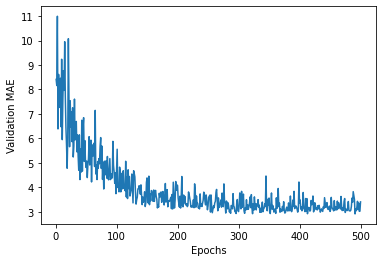

In [ ]:

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

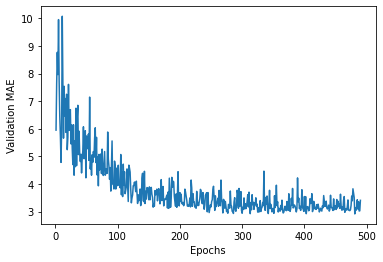

In [ ]:

truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 38.9376 - mae: 4.9804


In [ ]:
predictions = model.predict(test_data)
predictions[0]

array([13.941955], dtype=float32)